# Binary search tree

Source: https://blog.boot.dev/computer-science/binary-search-tree-in-python/

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
class BSTNode:
    def __init__(self, val=None):
        self.left = None
        self.right = None
        self.val = val

    # -----------------------------------------
    # insert()
    def insert(self, val):
        if not self.val:
            self.val = val
            return

        if self.val == val:
            return

        if val < self.val:
            if self.left:
                self.left.insert(val)
                return
            self.left = BSTNode(val)
            return

        if self.right:
            self.right.insert(val)
            return
        self.right = BSTNode(val)

    # -----------------------------------------
    # get_min() and get_max()
    def get_min(self):
        current = self
        while current.left is not None:
            current = current.left
        return current.val

    def get_max(self):
        current = self
        while current.right is not None:
            current = current.right
        return current.val

    # -----------------------------------------
    # delete()
    def delete(self, val):
        if self == None:
            return self
        if val < self.val:
            self.left = self.left.delete(val)
            return self
        if val > self.val:
            self.right = self.right.delete(val)
            return self
        if self.right == None:
            return self.left
        if self.left == None:
            return self.right
        min_larger_node = self.right
        while min_larger_node.left:
            min_larger_node = min_larger_node.left
        self.val = min_larger_node.val
        self.right = self.right.delete(min_larger_node.val)
        return self

    # -----------------------------------------
    # exists()
    def exists(self, val):
        if val == self.val:
            return True

        if val < self.val:
            if self.left == None:
                return False
            return self.left.exists(val)

        if self.right == None:
            return False
        return self.right.exists(val)

    # -----------------------------------------
    # inorder()
    def inorder(self, vals):
        if self.left is not None:
            self.left.inorder(vals)
        if self.val is not None:
            vals.append(self.val)
        if self.right is not None:
            self.right.inorder(vals)
        return vals

    # -----------------------------------------
    # tograph()
    def tograph(self):
        G = nx.DiGraph()
        G.add_node(self.val)
        if self.left is not None:
            leftG = self.left.tograph()
            G = nx.union(G, leftG)
            G.add_edge(self.val, self.left.val)
        if self.right is not None:
            rightG = self.right.tograph()
            G = nx.union(G, rightG)
            G.add_edge(self.val, self.right.val)
        return G

In [12]:
nums = [20, 33, 36, 48, 71, 53, 57]
bst = BSTNode()
for num in nums:
    bst.insert(num)
print("inorder:")
print(bst.inorder([]))

inorder:
[20, 33, 36, 48, 53, 57, 71]


In [13]:
G = bst.tograph()

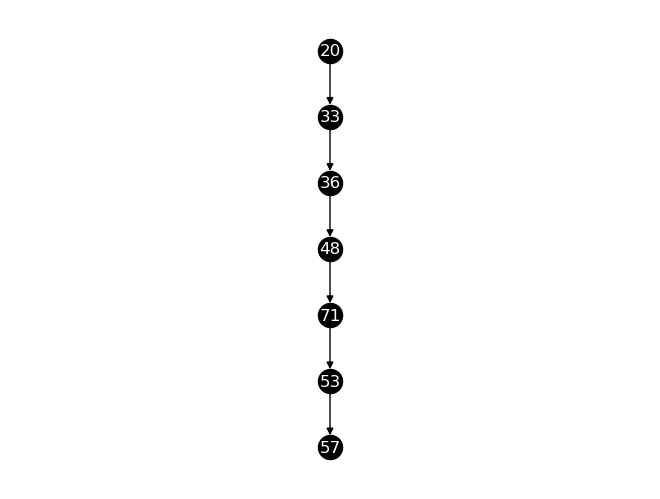

In [14]:
pos = graphviz_layout(G, prog="dot")
pos = {int(k): v for k, v in pos.items()}
nx.draw(G, pos, with_labels=True, node_color="black", font_color="white")